In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML
from sklearn.utils import shuffle
import pickle
import xgboost as xgb
import seaborn as sns

def evaluate(y_preds, y_test, standardized = False):
    print("\n")
    print(" --- EVALUATION --- ")
    if standardized:
        y_test_unstd = scaler.inverse_transform(y_test)
        y_preds_unstd = scaler.inverse_transform(y_preds)
        print("Standardized Dataset: Don't forget that, latest scaler object should belong to 'y'!")
        print("Mean Absolute error (MAE): %.2f"% np.mean(abs(y_preds_unstd - y_test_unstd)))
        print("Root Mean squared error: %.2f"% np.sqrt(np.mean((y_preds_unstd - y_test_unstd) ** 2)))
    else:
        print("Not Standardized Dataset")
        print("Mean Absolute error (MAE): %.2f"% np.mean(abs(y_preds - y_test.values)))
        print("Root Mean squared error: %.2f"% np.sqrt(np.mean((y_preds - y_test.values) ** 2)))
    print("\n")
    
from IPython.display import display, Markdown

def round_predictions_integer(y_preds, y_test):
    rounding_df = pd.DataFrame()
    rounding_df["y_unrounded_preds"] = y_preds
    rounding_df["y_rounded_preds"] = rounding_df["y_unrounded_preds"].apply(lambda row: round(row, 0))
    rounding_df['y_test'] = y_test.values
    display(Markdown("<font color = red> <font size = 4>\nAfter rounding predictions to closest integer values:\n"))
    evaluate(rounding_df['y_rounded_preds'], rounding_df['y_test'])
    
def round_predictions_decimal(y_preds, y_test, decimal):
    rounding_df = pd.DataFrame()
    rounding_df["y_unrounded_preds"] = y_preds
    rounding_df["y_rounded_preds"] = rounding_df["y_unrounded_preds"].apply(lambda row: round(row, decimal))
    rounding_df['y_test'] = y_test.values
    if decimal == 1:
        mark = 'st'
    elif decimal == 2:
        mark = 'nd'
    elif decimal == 3:
        mark = 'rd'
    else:
        mark = 'th'
    display(Markdown("<font color = red> <font size = 4>\nAfter rounding predictions to {}{} decimal values:\n".format(decimal, mark)))
    evaluate(rounding_df['y_rounded_preds'], rounding_df['y_test'])

def percent_missing_func(df):
    percent_missing = df.isnull().sum() * 100 / df.shape[0]
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    missing_value_df.reset_index(drop=True, inplace=True)
    return missing_value_df

def print_df(df):
    display(HTML(df.to_html()))
    
df_final = pd.read_csv("merged_data.csv")
#print_df(df_final.head())

categorical_labels = ['ResortName','ResortCountryName','ResortCityName','SubcategoryName']
numerical_labels = ['ElevationInfoMax', 'ElevationInfoMin', 'DistanceToAirport', 'avgSnowDepth', 'difficultKm',\
                    'easyKm', 'intermediateKm', 'skiRoutesKm']
y_label = ['Rating']
x_label = [i for i in df_final.columns if i not in y_label]

df_final = shuffle(df_final)
#print(df_final.shape)
#print_df(df_final.head())

y = df_final[y_label]
y = pd.DataFrame(y)
X = df_final[x_label]
X = pd.DataFrame(X)
#print_df(X.head())
#print_df(y.head())

X_one = pd.get_dummies(X)
X_one = pd.DataFrame(X_one)
for col in X_one.columns:
    X_one[col] = pd.to_numeric(X_one[col])
    
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_one_std = scaler.fit_transform(X_one)
X_one_std = pd.DataFrame(X_one_std)

X_one_std_num = X_one.copy()
some_features = X_one_std_num[numerical_labels]
some_features = scaler.fit_transform(some_features)
X_one_std_num[numerical_labels] = some_features
X_one_std_num = pd.DataFrame(X_one_std_num)

y_std = scaler.fit_transform(y)
y_std = pd.DataFrame(y_std)

X_train, X_test, y_train, y_test = train_test_split(X_one, y, test_size=0.20, random_state=61)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_one_std, y_std, test_size=0.20, random_state=61)
X_train_std_num, X_test_std_num, y_train_std_num, y_test_std_num = train_test_split(X_one_std_num, y_std, test_size=0.20, random_state=61)

In [2]:
filename = 'XGB_Grid_Hyperparameter_GridCV.sav'
loaded_XGB_grid = pickle.load(open(filename, 'rb'))
print(loaded_XGB_grid.best_params_)

[23:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'eval_metric': 'mae', 'learning_rate': 0.01, 'max_depth': 24, 'min_child_weight': 3, 'n_estimators': 1600, 'objective': 'reg:linear', 'subsample': 0.5}


C:\Users\han\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
XGB_y_preds = loaded_XGB_grid.predict(X_test)
evaluate(XGB_y_preds, y_test)
round_predictions_integer(XGB_y_preds, y_test)
round_predictions_decimal(XGB_y_preds, y_test, 1)
round_predictions_decimal(XGB_y_preds, y_test, 2)
round_predictions_decimal(XGB_y_preds, y_test, 3)



 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.95
Root Mean squared error: 1.20




<font color = red> <font size = 4>
After rounding predictions to closest integer values:




 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.44
Root Mean squared error: 0.67




<font color = red> <font size = 4>
After rounding predictions to 1st decimal values:




 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.46
Root Mean squared error: 0.61




<font color = red> <font size = 4>
After rounding predictions to 2nd decimal values:




 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.46
Root Mean squared error: 0.61




<font color = red> <font size = 4>
After rounding predictions to 3rd decimal values:




 --- EVALUATION --- 
Not Standardized Dataset
Mean Absolute error (MAE): 0.46
Root Mean squared error: 0.61




In [4]:
importances = loaded_XGB_grid.best_estimator_.feature_importances_
df_importance = pd.DataFrame()
df_importance['Feature'] = X_train.columns
df_importance['Importances'] = list(importances)
df_importance.sort_values(by=['Importances'], ascending=False, inplace = True)
df_importance.reset_index(drop=True, inplace=True)
#print_df(df_importance.head())

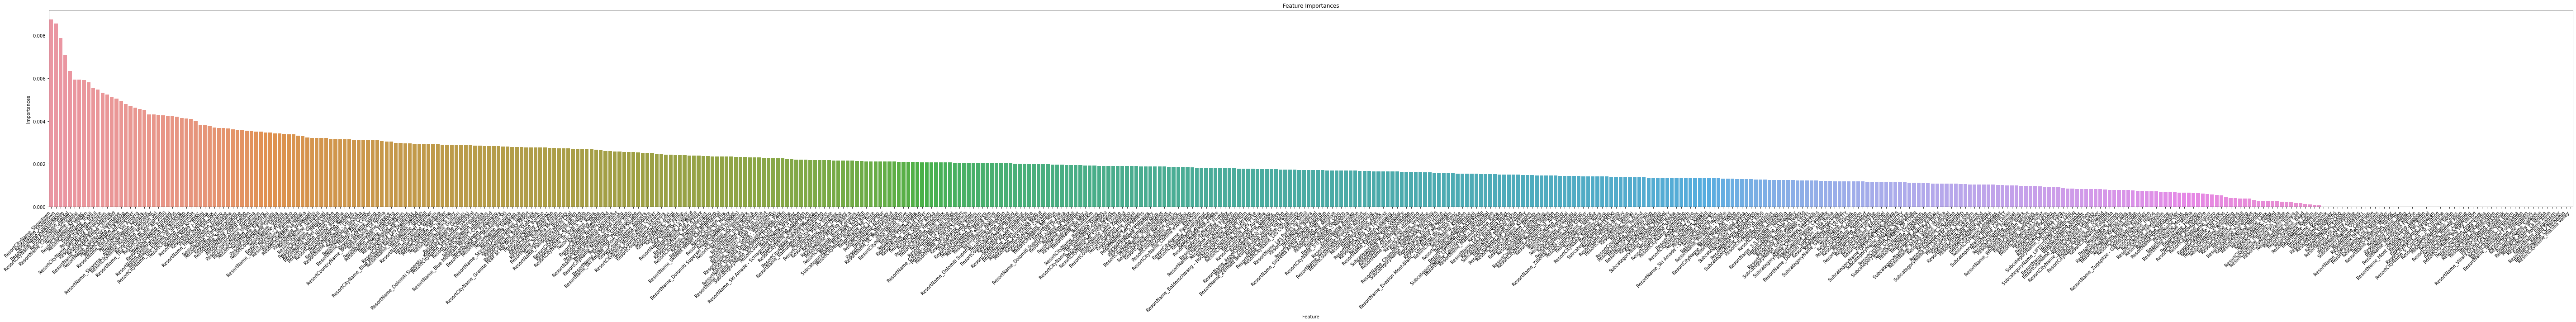

In [5]:
plt.figure(figsize=(100,8))
ax = sns.barplot(
    x = df_importance['Feature'],
    y = df_importance['Importances'])

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#plt.savefig("output.png")
plt.title('Feature Importances')
plt.show()

Category name: ResortName -> Total Importance: 0.4088511379814008
Category name: ResortCountryName -> Total Importance: 0.05936187494080514
Category name: ResortCityName -> Total Importance: 0.491589518438559
Category name: SubcategoryName -> Total Importance: 0.02777626650640741


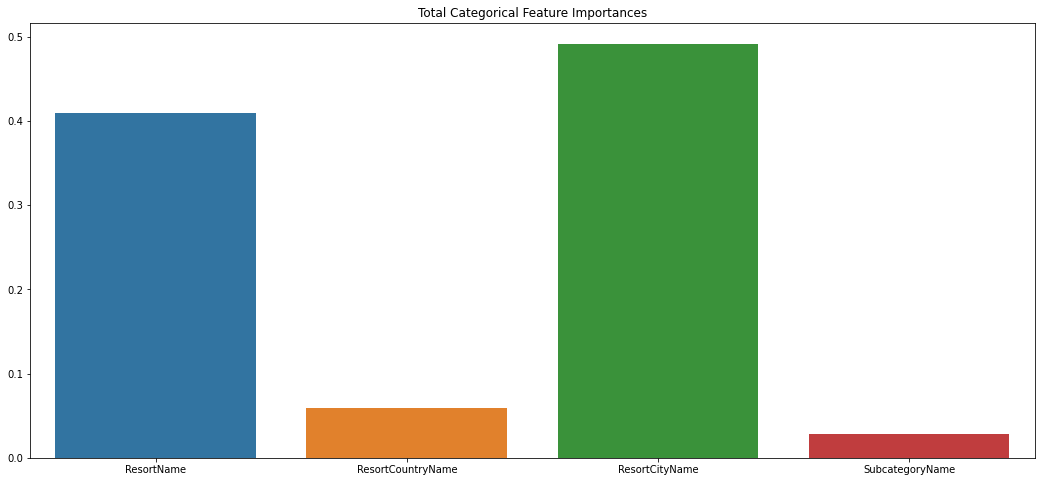

In [6]:
value_ = []
label_ = []
for i in categorical_labels:
    print('Category name: {} -> Total Importance: {}'.format(i, df_importance.loc[df_importance['Feature'].str.startswith(i)].Importances.sum()))
    value_.append(df_importance.loc[df_importance['Feature'].str.startswith(i)].Importances.sum())
    label_.append(i)    
    
    
plt.figure(figsize=(18,8))
ax = sns.barplot(
    x = label_,
    y = value_)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
plt.savefig("output_cat.png")
plt.title('Total Categorical Feature Importances')
plt.show()

Category name: ResortName -> Average Importance: 0.001956225540580865
Category name: ResortCountryName -> Average Importance: 0.0020469612048553496
Category name: ResortCityName -> Average Importance: 0.0017941223300677338
Category name: SubcategoryName -> Average Importance: 0.001262557568473064


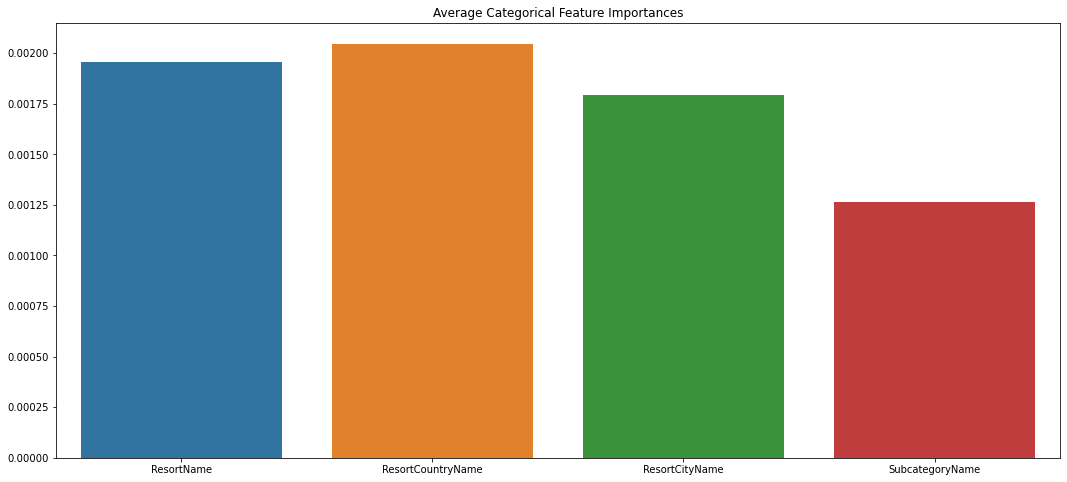

In [7]:
value2_ = []
label2_ = []
for i in categorical_labels:
    print('Category name: {} -> Average Importance: {}'.format(i, df_importance.loc[df_importance['Feature'].str.startswith(i)].Importances.mean()))
    value2_.append(df_importance.loc[df_importance['Feature'].str.startswith(i)].Importances.mean())
    label2_.append(i)    
    
    
plt.figure(figsize=(18,8))
ax = sns.barplot(
    x = label2_,
    y = value2_)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
plt.savefig("Category_Importance_XGB.png")
plt.title('Average Categorical Feature Importances')
plt.show()

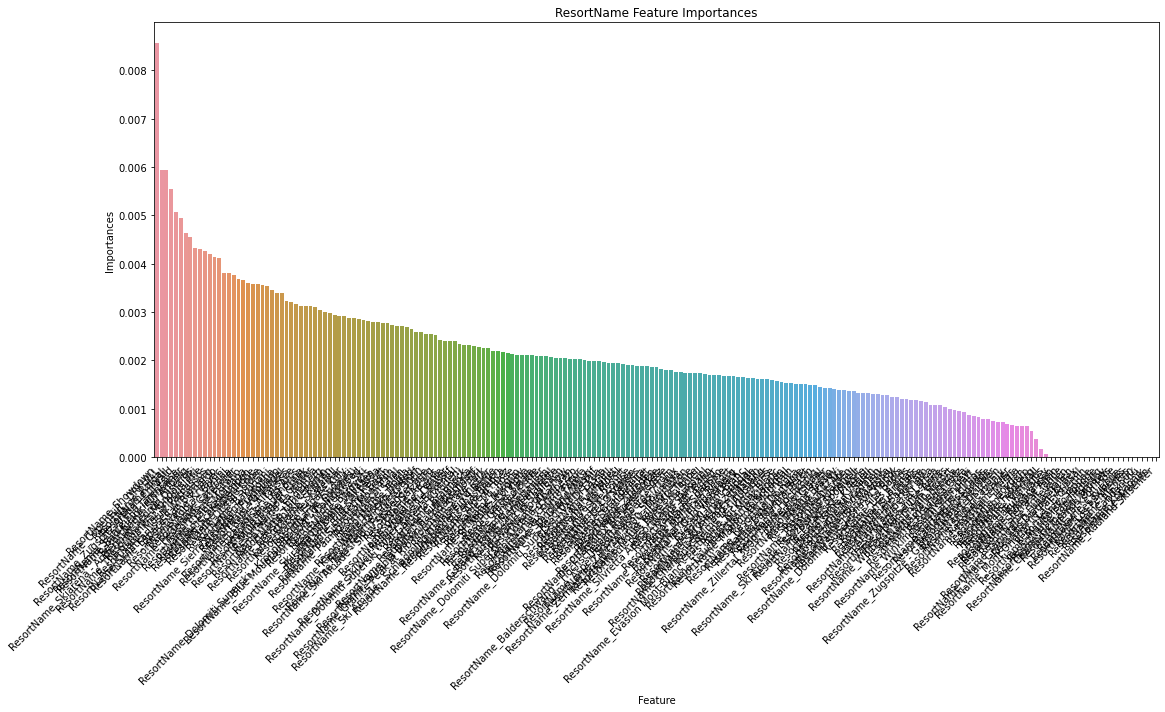

In [8]:
plt.figure(figsize=(18,8))
ax = sns.barplot(
    x = df_importance.loc[df_importance['Feature'].str.startswith(categorical_labels[0])].sort_values(by=['Importances'], ascending=False)['Feature'],
    y = df_importance.loc[df_importance['Feature'].str.startswith(categorical_labels[0])].sort_values(by=['Importances'], ascending=False)['Importances'])

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('{} Feature Importances'.format(categorical_labels[0]))
plt.show()

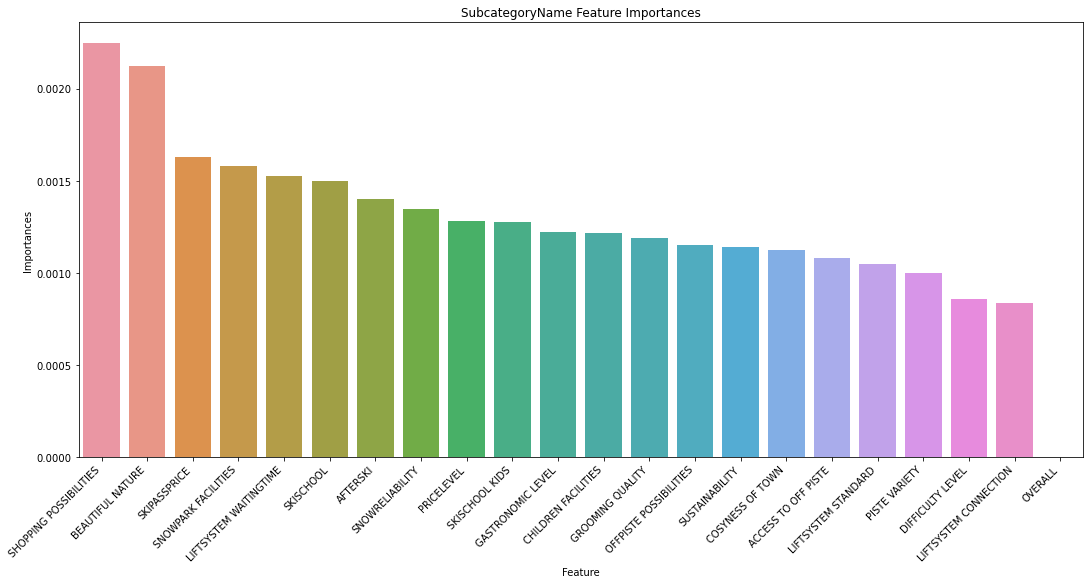

In [9]:
plt.figure(figsize=(18,8))
ax = sns.barplot(
    x = df_importance.loc[df_importance['Feature'].str.startswith(categorical_labels[3])].sort_values(by=['Importances'], ascending=False)['Feature'].str.replace('{}_'.format(categorical_labels[3]), ''),
    y = df_importance.loc[df_importance['Feature'].str.startswith(categorical_labels[3])].sort_values(by=['Importances'], ascending=False)['Importances'])

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('{} Feature Importances'.format(categorical_labels[3]))
plt.savefig("Sub_Category_Importance_XGB.png")
plt.show()

In [10]:
print("Best Estimator:\n{}\n".format(loaded_XGB_grid.best_estimator_))
print("Best Score:\n{}\n".format(loaded_XGB_grid.best_score_))
print("Best Parameters:\n{}\n".format(loaded_XGB_grid.best_params_))
print("Scorer:\n{}\n".format(loaded_XGB_grid.scorer_))

Best Estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eval_metric='mae',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=24, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=1600, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

Best Score:
-0.7386581837814471

Best Parameters:
{'colsample_bytree': 0.7, 'eval_metric': 'mae', 'learning_rate': 0.01, 'max_depth': 24, 'min_child_weight': 3, 'n_estimators': 1600, 'objective': 'reg:linear', 'subsample': 0.5}

Scorer:
make_scorer(mean_squared_error, greater_is_better=False, squared=False)

